# Importing needed libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import openpyxl
import numpy as np

# Importing Data

In [2]:
#Importing data
pdf1960 = pd.read_excel('./../Data sets/Census 1960.xlsx')

In [3]:
#Info about rows and columns
pdf1960.shape

#Changing the number of rows displayed
pd.set_option('display.max_rows', None)

#displaying first 5 rows
pdf1960.head()


,Unnamed: 0,Social Explorer - Census 1960 Tracts Only Set,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,Statistics,"Census Tract 00090000, Hamilton County, Ohio",NaN,"Census Tract 00100000, Hamilton County, Ohio",NaN,"Census Tract 00160000, Hamilton County, Ohio",NaN,"Census Tract 00170000, Hamilton County, Ohio",NaN,TOTAL (All Selected Census Tracts),NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,SE:T1. Total Population,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Total Population,5918,NaN,4946,NaN,5956,NaN,5917,NaN,22737,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Cleaning data

In [4]:
#Removing rows with all NaN values 
pdf1960 = pdf1960.dropna(subset=["Unnamed: 0"])
pdf1960 = pdf1960.dropna(subset=["Social Explorer - Census 1960 Tracts Only Set"])

# Replacing NaN by 0s
pdf1960 = pdf1960.fillna(0)

#Dropping first row
pdf1960 = pdf1960.drop([0])

#Showing a list of columns names
list(pdf1960)

['Unnamed: 0',
 'Social Explorer - Census 1960 Tracts Only Set',
 'Unnamed: 2',
 'Unnamed: 3',
 'Unnamed: 4',
 'Unnamed: 5',
 'Unnamed: 6',
 'Unnamed: 7',
 'Unnamed: 8',
 'Unnamed: 9',
 'Unnamed: 10']

In [5]:
#Renaming columns
pdf1960.columns = ['Category',
                   'Census Tract 9, Hamilton County, Ohio',
                   'Census Tract 9, Percentage',
                   'Census Tract 10, Hamilton County, Ohio',
                   'Census Tract 10, Percentage',
                   'Census Tract 16, Hamilton County, Ohio',
                   'Census Tract 16, Percentage',
                   'Census Tract 17, Hamilton County, Ohio',
                   'Census Tract 17, Percentage',
                   'TOTAL (All Selected Census Tracts)',
                   'TOTAL Percentage']

In [6]:
#Removing columns I dont want
for col in pdf1960.columns:
    if 'Percentage' in col:
        del pdf1960[col]
             

In [7]:
#Obtaining index values of all the rows
pdf1960.index.values

array([  3,   6,   9,  10,  11,  14,  15,  16,  17,  20,  21,  22,  23,
        24,  25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  50,  51,  52,  55,
        56,  57,  58,  59,  60,  63,  64,  65,  66,  67,  68,  69,  70,
        71,  72,  73,  74,  77,  78,  79,  80,  81,  82,  83,  84,  85,
        86,  87,  90,  91,  92,  93,  94,  95,  96,  99, 100, 101, 104,
       105, 106, 107, 108, 111, 112, 113, 114, 115, 116, 117, 118, 119,
       120, 121, 122, 123, 126, 127, 128, 129, 130, 131, 132, 133, 134,
       135, 136, 137, 140, 141, 142, 145, 146, 147, 148, 149, 150, 153,
       154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166,
       169, 172, 173, 174, 175, 176, 177, 180, 181, 182, 183, 184, 185,
       186, 187, 188], dtype=int64)

In [8]:
#Obtaining index values of all the rows
pdf1960.index.values


#Removing all the rows I don't want
pdf1960 = pdf1960.drop([3,   6,   9,  10,  11,  20,  21,  22,  23,
        24,  25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  50,  51,  52,  55,
        56,  57,  58,  59,  60,  63,  64,  65,  66,  67,  68,  69,  70,
        71,  72,  73,  74,  77,  78,  79,  80,  81,  82,  83,  84,  85,
        86,  87,  90,  91,  92,  93,  94,  95,  96,  99, 100, 101, 104,
       105, 106, 107, 108, 111, 112, 113, 114, 115, 116, 117, 118, 119,
       120, 121, 122, 123, 126, 127, 128, 129, 130, 131, 132, 133, 134,
       135, 136, 137, 140, 141, 142, 145, 146, 147, 148, 149, 150, 153,
       154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166,
       169, 172, 173, 174, 175, 176, 177, 180, 181, 182, 183, 184, 185,
       186, 187, 188])

In [9]:
#Changing the data to floats
pdf1960 = pdf1960.astype({'Census Tract 9, Hamilton County, Ohio': np.float64, 'Census Tract 10, Hamilton County, Ohio':np.float64,
                          'Census Tract 16, Hamilton County, Ohio':np.float64,'Census Tract 17, Hamilton County, Ohio':np.float64,
                          'TOTAL (All Selected Census Tracts)':np.float64})

#Checking if data are floats now
pdf1960.dtypes

Category                                   object
Census Tract 9, Hamilton County, Ohio     float64
Census Tract 10, Hamilton County, Ohio    float64
Census Tract 16, Hamilton County, Ohio    float64
Census Tract 17, Hamilton County, Ohio    float64
TOTAL (All Selected Census Tracts)        float64
dtype: object

In [10]:
pdf1960

,Category,"Census Tract 9, Hamilton County, Ohio","Census Tract 10, Hamilton County, Ohio","Census Tract 16, Hamilton County, Ohio","Census Tract 17, Hamilton County, Ohio",TOTAL (All Selected Census Tracts)
14,Total Population:,5918.0,4946.0,5956.0,5917.0,22737.0
15,White,5049.0,4891.0,5455.0,5604.0,20999.0
16,Black,842.0,37.0,501.0,309.0,1689.0
17,Other Race,27.0,18.0,0.0,4.0,49.0


# Creating visualizations

<AxesSubplot:xlabel='Category'>

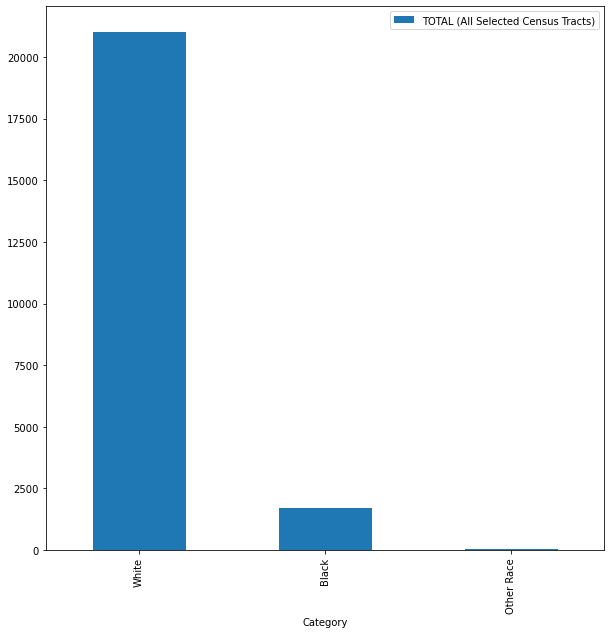

In [11]:
# Total white and Black population of OTR 
pdf1960.iloc[1:4].plot.bar(x = 'Category', y = 'TOTAL (All Selected Census Tracts)', figsize=(10,10))

In [12]:
pdf1960.to_pickle('pdf1960.pkl')